# 2. Pre-Processing

In [2]:
# Import data manipulation libraries
import numpy as np
import pandas as pd

# Import data visualisation libraries
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from matplotlib import rc
import seaborn as sns

# Import machine learning libraries
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set graph defaults
plt.rc('font', family='serif', size=10)
plt.rc('legend', fontsize=10)
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['CMU Serif']
plt.rcParams['axes.unicode_minus'] = False

# Read in data
X_train = pd.read_csv("X_train.csv")
y_train = pd.read_csv("y_train.csv")

# Read in data summary
data_summary = pd.read_csv("data_summary.csv", index_col=0)

### 2.1 Data Cleaning

In [43]:
# Identify rows with missing data
cols_missing = data_summary[data_summary["min"] == -9999.0].index.to_list()
rows_missing = []
for i in cols_missing:
    rows_missing = rows_missing + X_train[X_train["rowv"] == -9999.0].index.to_list()

# Remove rows with missing data
X_train_clean = X_train.drop(rows_missing)

# Identify rows with data more than five standard deviations away from the mean
#cols_outlier = []
#rows_outlier = []
#for i in X_train.columns.to_list():
#    diff = abs(X_train_clean[i] - data_summary.loc[i]["mean"]) / data_summary.loc[i]["std"]
#    diff_rows = diff[diff > 10].index.to_list()
#    rows_outlier = rows_outlier + diff_rows
#    if len(diff_rows) > 0:
#        cols_outlier.append(i)

# Remove rows with outlier data
#X_train_clean = X_train_clean.drop(rows_outlier)

# Scale data
scaler = StandardScaler()
scaler.fit(X_train_clean)
X_train_clean = pd.DataFrame(scaler.transform(X_train_clean))
X_train_clean.columns = X_train.columns

### 2.2 PCA Dimensionality Reduction

In [44]:
# Get principal components
K = 25
columns= ["PCA" + str(i + 1) for i in range(K)]
pca = PCA(n_components = K)
pca.fit(X_train_clean)

# Label principal components
V = pd.DataFrame(data=pca.components_.T,
                 columns=columns,
                 index=X_train_clean.columns)
print('Principal components:\n', V) 

# Calculate eigenvalues of the projections
lam = pca.explained_variance_
print('\n Eigenvalues/variance of the projections:\n', lam)

# Compute the projections onto the principal components
Z_pca = pca.transform(X_train_clean)
X_train_clean_pca = pd.DataFrame(Z_pca, columns=columns)

Principal components:
                    PCA1      PCA2      PCA3      PCA4      PCA5      PCA6  \
ra            -0.004875 -0.037061  0.000024  0.002877  0.025542 -0.014981   
dec           -0.017665 -0.208113  0.001607  0.013824 -0.043098 -0.035325   
rowv          -0.000163  0.000157  0.001132 -0.004703 -0.000048  0.014859   
colv          -0.000896 -0.001325 -0.000231  0.002813 -0.000947 -0.014958   
sky_u          0.027667  0.245862 -0.004800  0.008002 -0.018170  0.030079   
...                 ...       ...       ...       ...       ...       ...   
spectroFlux_u  0.208207 -0.033614 -0.008250  0.019887 -0.037763  0.042018   
spectroFlux_g  0.219767 -0.042848 -0.021733  0.204036  0.008991  0.078662   
spectroFlux_r  0.200631 -0.040020 -0.024850  0.254931  0.031905  0.081813   
spectroFlux_i  0.193903 -0.036864 -0.024985  0.261095  0.039952  0.076138   
spectroFlux_z  0.189053 -0.034525 -0.024696  0.261552  0.043340  0.069971   

                   PCA7      PCA8      PCA9     PCA1

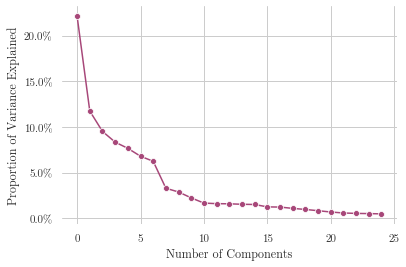

In [45]:
# Create scree plot to determine the optimal number of principal components
ax = sns.lineplot(y=pca.explained_variance_ratio_ * 100, x=range(25), marker='o', color="#a74779")
ax.set(title = "",
       ylabel = "Proportion of Variance Explained", xlabel = "Number of Components")
sns.set(font="CMU Serif", style="whitegrid")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
sns.despine(left=True, bottom=True)
ax

# Export plot
fig = ax.get_figure()
fig.savefig("scree.png", dpi=1200, bbox_inches="tight") 

In [9]:
# Export data
X_train_clean_pca.to_csv("X_train_clean_pca.csv", index=True)